convolutional neural network (CNN) model based on the VGG16 architecture to classify images as either "dog" or "cat" from the Kaggle "Dogs vs. Cats" dataset.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


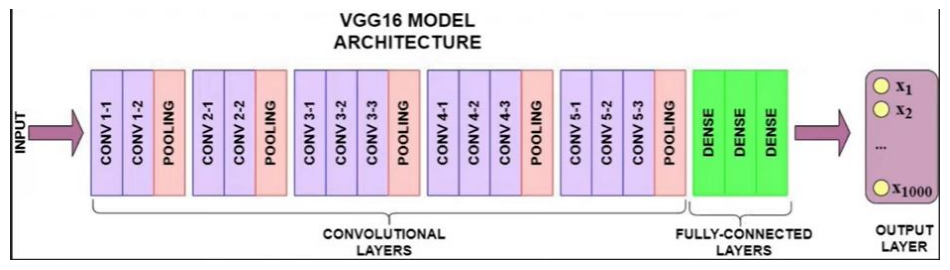

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread('/content/transfer fe.JPG')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:15<00:00, 119MB/s]
100% 1.06G/1.06G [00:15<00:00, 74.5MB/s]


Download the dataset from Kaggle and extract it to the /content directory using the zipfile library.

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

VGG16 is a pre-trained model that has been trained on the ImageNet dataset.

The model's convolutional base (conv_base) is loaded without its top fully-connected layers (include_top=False), as we will replace them with a custom classifier for the dog-vs-cat classification task.

The input image size is set to 150x150 with 3 color channels (RGB).

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


A Sequential model is created, starting with the pre-trained VGG16 convolutional base.

The output from the convolutional base is flattened (converted to a 1D array).

Two fully connected (Dense) layers are added:

The first one has 256 units with the ReLU activation function.

The second layer is the output layer with 1 unit and a sigmoid activation, indicating a binary classification (dog or cat).

The pre-trained VGG16 layers are frozen (conv_base.trainable = False), meaning their weights will not be updated during training.

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable = False

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

It defines data augmentation and generators for training and validation datasets

Data augmentation is applied to the training data using ImageDataGenerator. This helps the model generalize better by generating variations of the training images (e.g., by flipping or zooming).

Both training and testing data are rescaled by dividing pixel values by 255 to normalize them between 0 and 1.

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


The model is compiled with the following settings:

Adam optimizer: Adaptive learning rate optimization algorithm.

Binary cross-entropy loss: Suitable for binary classification tasks.

Accuracy is tracked as the performance metric.

The model is then trained for 10 epochs using the fit method, where:
The model uses train_generator for training.

Validation is done on validation_generator after each epoch to track the model’s performance on unseen data.

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

The training results indicate that the model steadily improves in recognizing dogs and cats, with training accuracy increasing from 89.71% to 93.98% over 10 epochs. The training loss decreases consistently, reflecting the model’s learning progress. The validation accuracy starts high at 90.68% and fluctuates slightly, peaking at 91.94% by epoch 6. Validation loss follows a similar trend, dropping initially but rising again after epoch 6.

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 277ms/step - accuracy: 0.8971 - loss: 0.2349 - val_accuracy: 0.9068 - val_loss: 0.2184
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 272ms/step - accuracy: 0.9089 - loss: 0.2106 - val_accuracy: 0.9102 - val_loss: 0.2029
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 273ms/step - accuracy: 0.9087 - loss: 0.2068 - val_accuracy: 0.9144 - val_loss: 0.1983
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 276ms/step - accuracy: 0.9192 - loss: 0.1897 - val_accuracy: 0.9160 - val_loss: 0.1921
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 265ms/step - accuracy: 0.9270 - loss: 0.1730 - val_accuracy: 0.9180 - val_loss: 0.1945
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 257ms/step - accuracy: 0.9280 - loss: 0.1713 - val_accuracy: 0.9194 - val_loss: 0.1906
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 257ms/step - accuracy: 0.9311 - loss: 0.1642 - val_accuracy: 0.9188 - val_loss: 0.1932
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 209s 269ms/step - accuracy: 0.9327 -

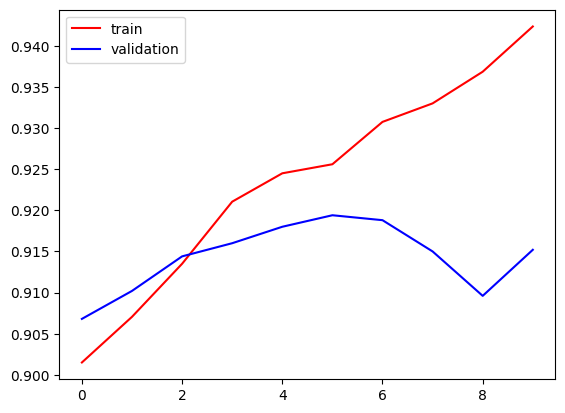

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

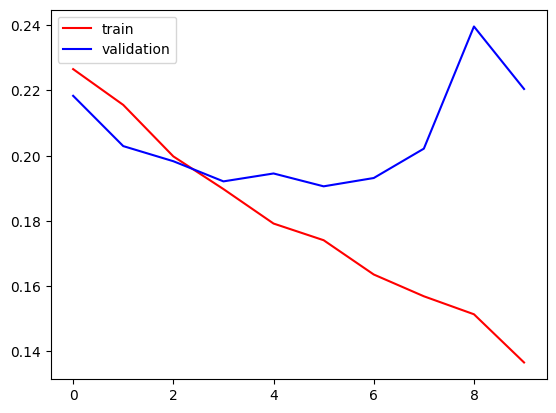

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


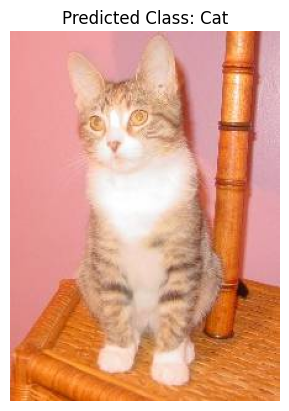

The predicted class for the image is: Cat


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess a single image, make predictions, and display the image
def predict_and_show_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(150, 150))  # Resize image to match model input shape
    img_array = img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension (batch size)

    # Rescale the image, since it was done during training
    img_array = img_array / 255.0

    # Make a prediction
    prediction = model.predict(img_array)

    # Convert the prediction to a binary value
    predicted_class = "Dog" if prediction[0] > 0.5 else "Cat"

    # Display the image
    plt.imshow(load_img(image_path))  # Load and display the image
    plt.axis('off')  # Remove the axis for a cleaner image
    plt.title(f"Predicted Class: {predicted_class}")  # Show predicted class as title
    plt.show()

    # Return the prediction result
    return predicted_class

# Example usage
image_path = '/content/test/cats/cat.10007.jpg'  # Provide the path to the image you want to predict
result = predict_and_show_image(image_path)
print(f"The predicted class for the image is: {result}")
